# Emotional and Linguistic Framing of Digital Detox

### Notebook 6: Statistical Tests

Purpose:
- Compare emotional and sentiment features between detox and control groups using Mann-Whitney U (non-parametric)
- Analyse topic distribution differences using Chi-square tests
- Explore relationships between VAD (Valence, Arousal, Dominance) and sentiment features (Polarity, Subjectivity) using correlation analysis

In [1]:
# required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import (
    ttest_ind, mannwhitneyu, chi2_contingency, shapiro,
    pearsonr, spearmanr
)

# load datasets
df_final_with_sentiment = pd.read_csv("df_vad_weighted_with_sentiment.csv")
df_pca = pd.read_csv("df_vad_pca.csv")

In [2]:
df_final_with_sentiment

,valence,arousal,dominance,polarity,subjectivity,label,topic
0,0.343223,-0.309104,-0.065642,0.487500,0.550000,control,-1
1,0.501784,-0.210219,-0.023607,0.021726,0.558631,control,3
2,0.436460,-0.360925,0.511816,0.013988,0.327930,control,7
3,0.958519,0.012790,0.167834,0.000842,0.460899,control,0
4,0.555933,0.142616,-0.245506,0.153091,0.474642,control,0
...,...,...,...,...,...,...,...
6995,1.895054,-0.520073,1.028242,0.142784,0.513104,detox,7
6996,1.056524,0.084038,0.923500,0.034286,0.436804,detox,1
6997,1.576770,-0.779863,0.299404,0.038332,0.419818,detox,0
6998,2.931102,-0.877767,0.736264,0.006797,0.422326,detox,-1


### Independent Samples t-test / Mann-Whitney U Test

In [5]:
# mann-whitney u test is a non-parametric alternative to t-test 
# compares the distributions of the detox and control groups without assuming equal variance

# define variables to test
variables = ['valence', 'arousal', 'dominance', 'polarity', 'subjectivity']

# split data by group
detox = df_final_with_sentiment[df_final_with_sentiment['label'] == 'detox']
control = df_final_with_sentiment[df_final_with_sentiment['label'] == 'control']

# run mann-whitney u test for each variable
for var in variables:
    stat, p = mannwhitneyu(detox[var], control[var])
    print(f"mann-whitney u for {var}: U={stat:.2f}, p={p:.3e}")

mann-whitney u for valence: U=7982980.00, p=4.701e-107
mann-whitney u for arousal: U=4887266.00, p=1.539e-48
mann-whitney u for dominance: U=7782881.00, p=1.250e-85
mann-whitney u for polarity: U=6466893.00, p=5.250e-05
mann-whitney u for subjectivity: U=5013056.50, p=1.635e-39


### Boxplots

/tmp/ipykernel_185/519806311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_with_sentiment, x='label', y=var, palette='Set1')


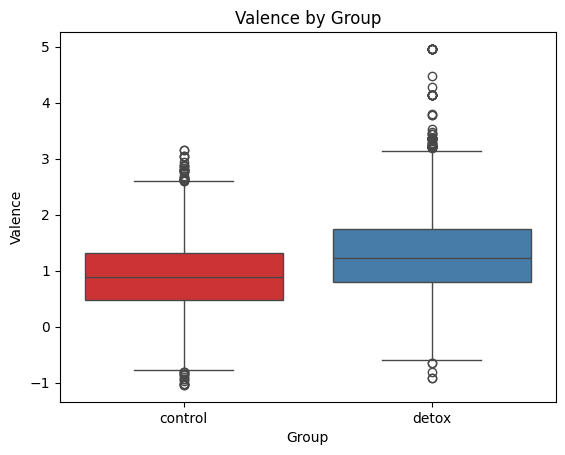

/tmp/ipykernel_185/519806311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_with_sentiment, x='label', y=var, palette='Set1')


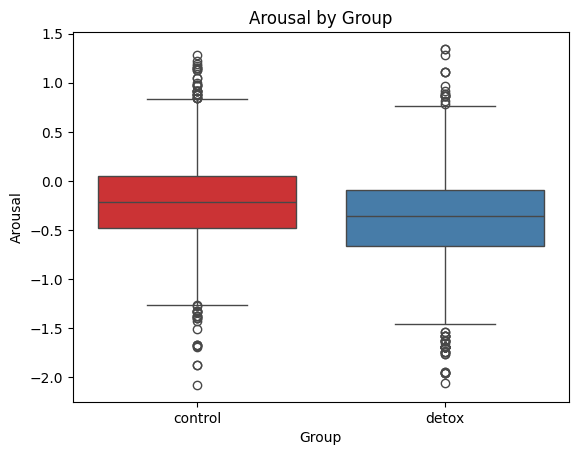

/tmp/ipykernel_185/519806311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_with_sentiment, x='label', y=var, palette='Set1')


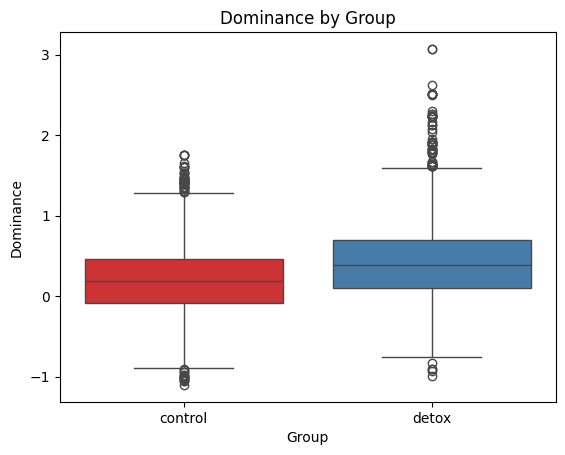

/tmp/ipykernel_185/519806311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_with_sentiment, x='label', y=var, palette='Set1')


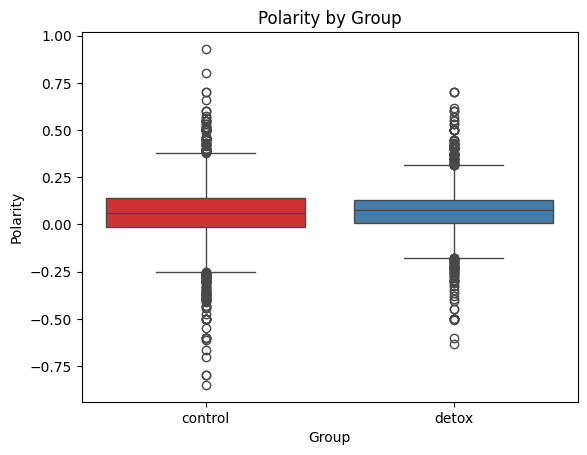

/tmp/ipykernel_185/519806311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final_with_sentiment, x='label', y=var, palette='Set1')


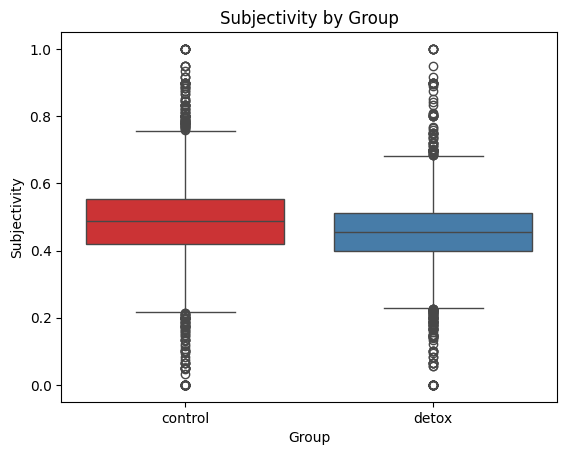

In [7]:
# Nik. (2023, February 8). Seaborn Boxplot – How to create box and whisker plots. Datagy. https://datagy.io/seaborn-boxplot/
variables = ['valence', 'arousal', 'dominance', 'polarity', 'subjectivity']

# loop through each variable and create a boxplot comparing groups
for var in variables:
    # box plots grouped by label
    sns.boxplot(data=df_final_with_sentiment, x='label', y=var, palette='Set1')
    plt.title(f"{var.capitalize()} by Group")
    plt.xlabel("Group")
    plt.ylabel(var.capitalize())
    plt.show()

### Chi-square Test for Topic Distribution

In [9]:
# Research With Fawad. (2020, December 29). Crosstab Report and Chi Square Test using SPSS [Video]. YouTube. https://www.youtube.com/watch?v=7oq6snUiXb0
# Thevapalan, A. (2024, August 29). Chi-Square Test in R: A complete guide. https://www.datacamp.com/tutorial/chi-square-test-r

# chi-square test is used here to assess whether the distribution of topics
# is independent of the group label (detox vs control)
# since both variables are categorical and the hypothesis is testing for an association 
# between them in a contingency table  Chi-square test is appropriate. 

import pandas as pd

# chi-square test for topic distribution
# create contingency table of counts for 'label' vs 'topic'
contingency_table = pd.crosstab(df_final_with_sentiment['label'], df_final_with_sentiment['topic'])

# chi-square test of independence on the contingency table
chi2, p, _, _ = chi2_contingency(contingency_table)

# chi-square stat and p-value in scientific notation
print("chi-square:", round(chi2, 2), "p-value:", format(p, ".3e"))

chi-square: 263.99 p-value: 1.105e-51


### Spearman Correlation of VAD to Sentiment

In [12]:
# Spearman correlation | Python. (n.d.). https://campus.datacamp.com/courses/performing-experiments-in-python/testing-normality-parametric-and-non-parametric-tests?ex=12
# DATAtab. (2023, April 5). Spearman Rank Correlation [Simply explained] [Video]. YouTube. https://www.youtube.com/watch?v=XV_W1w4Nwoc

# correlation analysis was conducted to explore relationships between 
# affective dimensions (valence, arousal, dominance) and sentiment metrics (polarity, subjectivity)
# spearman correlation coefficients were calculated to capture monotonic relationships
# accounting for potential non-normality and non-linearity in the data.

pairs = [('valence', 'polarity'), ('arousal', 'subjectivity'), ('dominance', 'polarity')]

for x, y in pairs:
    sr, sp = spearmanr(df_final_with_sentiment[x], df_final_with_sentiment[y])
    print(f"{x} vs {y} | Spearman ρ={sr:.2f}, p={sp:.3f}")

valence vs polarity | Spearman ρ=0.39, p=0.000
arousal vs subjectivity | Spearman ρ=0.16, p=0.000
dominance vs polarity | Spearman ρ=0.30, p=0.000


#Galatzan, B. J., Carrington, J. M., & Gephart, S. (2021). Testing the use of natural language processing software and content analysis to analyse nursing hand-off text data. CIN Computers Informatics Nursing, 39(8), 411–417. https://doi.org/10.1097/cin.0000000000000732
#### Statistical Results Interpretation

**Mann-Whitney U Test Results:**
- **Valence:** U=7,982,980, p=4.70×10⁻¹⁰⁷ (extremely significant) - Detox posts significantly more positive
- **Arousal:** U=4,887,266, p=1.54×10⁻⁴⁸ (extremely significant) - Control posts significantly more emotionally intense  
- **Dominance:** U=7,782,881, p=1.25×10⁻⁸⁵ (extremely significant) - Detox posts show significantly higher sense of control
- **Polarity:** U=6,466,893, p=5.25×10⁻⁰⁵ (significant) - Detox posts slightly more positive sentiment
- **Subjectivity:** U=5,013,057, p=1.64×10⁻³⁹ (extremely significant) - Control posts more subjective/opinion-based

**Effect Interpretation:** All p-values << 0.001 indicate not just statistical significance but practical significance. The extremely large U-statistics with tiny p-values suggest robust, replicable differences between communities.

**Chi-Square Topic Distribution:** χ²=263.99, p=1.11×10⁻⁵¹ confirms that digital detox and control communities discuss fundamentally different topics.

**Spearman Correlations:** VAD dimensions show expected relationships with sentiment metrics, validating the emotional measurement approach.

These results strongly support both H1 (VAD differences) and H2 (thematic differences).